## ANUClim Rainfall demo

This notebook demonstrates how to fetch data from CSIRO's OpenDAP server and do something with it.

Install pydap

In [1]:
!pip install pydap

    100% |████████████████████████████████| 2.3MB 6.4MB/s 
    100% |████████████████████████████████| 122kB 20.6MB/s 
    100% |████████████████████████████████| 92kB 18.4MB/s 
  Running setup.py bdist_wheel for docopt ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from pydap.client import open_url
import numpy as np
import matplotlib.pyplot as plt

Load ANUClim monthly rainfall data

In [2]:
dataset = open_url('http://dapds00.nci.org.au/thredds/dodsC/rr9/eMAST_data/ANUClimate/ANUClimate_v1-0_rainfall_monthly_0-01deg_1970-2016')

Extract indicies into data

In [3]:
lats = dataset['lat']
lons = dataset['lon']
times = dataset['time']
prec = dataset['lwe_thickness_of_precipitation_amount']

Inspect dataset

In [22]:
from pprint import pformat
from textwrap import indent
print("Keys:", list(dataset.keys()))
print("Lats:", lats.shape, "Lons:", lons.shape, "Times:", times.shape, "Prec:", prec.shape)
print("Times attributes:")
print(indent(pformat(times.attributes), '    '))
print("Prec attributes:")
print(indent(pformat(prec.attributes), '    '))

Keys: ['lon', 'crs', 'lat', 'time', 'lwe_thickness_of_precipitation_amount']
Lats: (3474,) Lons: (4110,) Times: (564,) Prec: (564, 3474, 4110)
Times attributes:
    {'axis': 'T',
     'calendar': 'gregorian',
     'long_name': 'time',
     'standard_name': 'time',
     'units': 'seconds since 1970-01-01 00:00:00'}
Prec attributes:
    {'_FillValue': -999.0,
     'coordinates': 'time lat lon',
     'grid_mapping': 'crs',
     'long_name': 'Monthly total precipitation: ANUClimate 1.0, 0.01 degree, '
                  'Australian Coverage, 1970-2016',
     'standard_name': 'lwe_thickness_of_precipitation_amount',
     'units': 'mm month-1'}


get data for first month

In [23]:
month0 = prec.array[0]
data = np.squeeze(month0)

plot data

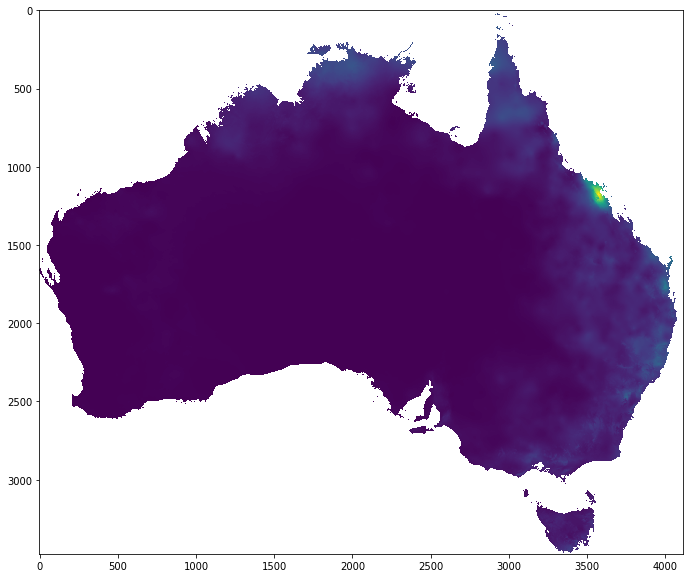

In [24]:
fig = plt.figure(figsize=(20,10))
_ = plt.imshow(data)

We can download up to 500MB at once from this OpenDAP endpoint, so we need to chunk
the download for a whole year into two blocks.

In [25]:
months_year0 = np.concatenate((prec.array[0:6], prec.array[6:12]))

Calculate mean, max and min over whole year

In [26]:
mean_year0 = np.nanmean(months_year0, axis=0)
max_year0 = np.nanmax(months_year0, axis=0)
min_year0 = np.nanmin(months_year0, axis=0)

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: All-NaN slice encountered
  from ipykernel import kernelapp as app
/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: All-NaN slice encountered
  app.launch_new_instance()


Plot mean, max, min

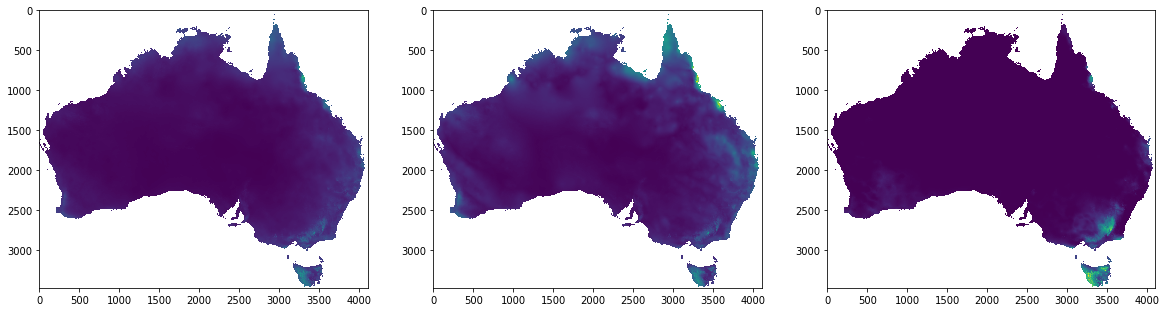

In [27]:
f, axarr = plt.subplots(1, 3, figsize=(20,10))
_ = axarr[0].imshow(mean_year0)
_ = axarr[1].imshow(max_year0)
_ = axarr[2].imshow(min_year0)

Show some stats about downloaded data

In [28]:
from scipy import stats

In [29]:
def print_stats(a):
    summary = stats.describe(a, axis=None, nan_policy='omit')
    print("Min: ", float(summary.minmax[0]))
    print("Max: ", float(summary.minmax[1]))   
    print("Mean: ", summary.mean)
    print("Var: ", summary.variance)
    print("Count: ", summary.nobs)
    print("Skew: ", summary.skewness)
    print("Kurtosis:", summary.kurtosis)
print("======= Mean =======")
print_stats(mean_year0)
print("======= Max  =======")
print_stats(max_year0)
print("======= Min  =======")
print_stats(min_year0)

======= Mean =======
Min:  1.9967947006225586
Max:  521.2548217773438
Mean:  31.721283530109034
Var:  902.6739414521622
Count:  6978504
Skew:  2.285572049354693
Kurtosis: 8.235737711703843
======= Max  =======
Min:  8.763446807861328
Max:  1183.6588134765625
Mean:  113.17884291532971
Var:  9856.223382438131
Count:  6978504
Skew:  2.4908760525235762
Kurtosis: 9.582215444550105
======= Min  =======
Min:  0.0
Max:  88.11744689941406
Mean:  1.433641078374391
Var:  32.788902466345434
Count:  6978504
Skew:  6.852497554522892
Kurtosis: 55.45828313128847


In [30]:
print(np.nanmin(months_year0), np.nanmax(months_year0))

0.0 1183.6588


Plot the sum of all rainfall within that year

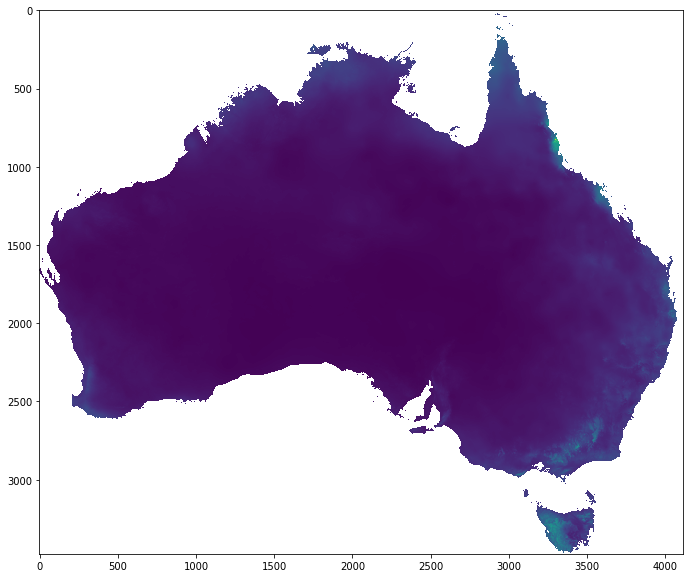

In [32]:
fig = plt.figure(figsize=(20,10))
_ = plt.imshow(np.sum(months_year0, axis=0))